In [2]:
from pathlib import Path
from utils import load_checkpoint

model_type = 'gfz'
checkpoint = load_checkpoint(Path.cwd() / f"checkpoints_results/{model_type}-50-epochs-a-50/")

accuracy = checkpoint['metrics']['test_accuracy'][0]
print(f"Test accuracy of {model_type} model (50 epochs): {checkpoint['metrics']['test_accuracy'][0]}")

micro_recall = checkpoint['metrics']['test_recall_macro'][0]
print(f"Test macro recall of {model_type} model (50 epochs): {micro_recall}")

micro_precision = checkpoint['metrics']['test_precision_macro'][0]
print(f"Test macro precision of {model_type} model (50 epochs): {micro_precision}")

micro_f1 = checkpoint['metrics']['test_f1_score_macro'][0]
print(f"Test macro F1 score of {model_type} model (50 epochs): {micro_f1}")

/Users/alexandrelutt/Desktop/Travail/ENPC/3A/MVA/Probabilistic Graphical Models/adversarial-attacks-on-generative-classifiers/.venv/lib/python3.9/site-packages/orbax/checkpoint/type_handlers.py:1346: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs.
  warnings.warn(


Test accuracy of gfz model (50 epochs): 0.8081
Test macro recall of gfz model (50 epochs): 0.8076920486914372
Test macro precision of gfz model (50 epochs): 0.8074786085005593
Test macro F1 score of gfz model (50 epochs): 0.8053111136324096


In [7]:
!ls

L-BFGS_exploration.ipynb     frozen_requirements.txt
ZOO_attack.ipynb             generative-classifiers.ipynb
__pycache__                  gpu_requirements.txt
attack.py                    initial-model-20-epochs.pkl
attacks                      initial-model.pkl
checkpoints                  models
checkpoints_results          optimiser.py
configs                      read_checkpoints.ipynb
data                         requirements.txt
dataset_utils.py             tpu_requirements.txt
detect_corruptions.ipynb     train.py
evaluate.py                  truncated_deepfool.ipynb
explore_models.ipynb         utils.py
first-training.png


In [17]:
model_type = 'dfz'
checkpoint = load_checkpoint(Path.cwd() / f"checkpoints_results/{model_type}-50-epochs-a-50-fastgradientsign-with-correction-logit-detection/")

/Users/alexandrelutt/Desktop/Travail/ENPC/3A/MVA/Probabilistic Graphical Models/adversarial-attacks-on-generative-classifiers/.venv/lib/python3.9/site-packages/orbax/checkpoint/type_handlers.py:1346: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs.
  warnings.warn(


In [18]:
false_positive_rates = checkpoint['metrics']['false_positive_rates']
true_positive_rates = checkpoint['metrics']['true_positive_rates']

import matplotlib.pyplot as plt

def display_roc_curve(false_positives_list, true_positive_rates, model_name, save=False):
    plt.plot(false_positives_list, true_positive_rates)
    plt.xlabel("False positives")
    plt.ylabel("Detection rate")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.title(f"ROC curve - {model_name} on {model_type.upper()} model")
    if save:
        plt.savefig(f"../latex/illustrations/ROC_{model_name}_{model_type}.png")
    plt.show()

In [21]:
checkpoint['metrics']['attack_success_rate']

0.21400000154972076

In [19]:
import numpy as np

np.mean(checkpoint['metrics']['detection_rate_at_5_pc'])

0.6843

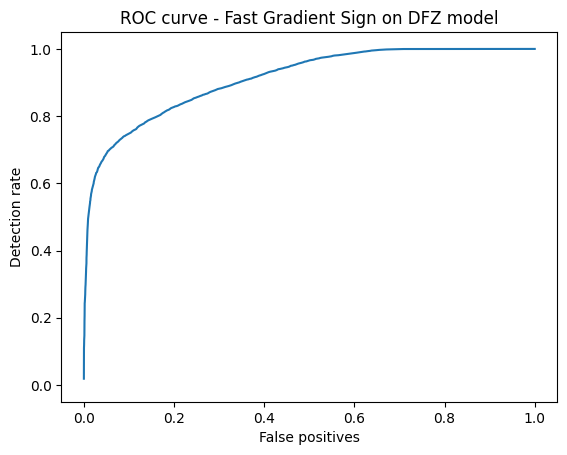

In [20]:
display_roc_curve(false_positive_rates, true_positive_rates, 'Fast Gradient Sign', save=True)